In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Datos
#=======================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
"Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
"Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona","Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
"Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654,
735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641,
624, 570, 593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs':
runs})

datos

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


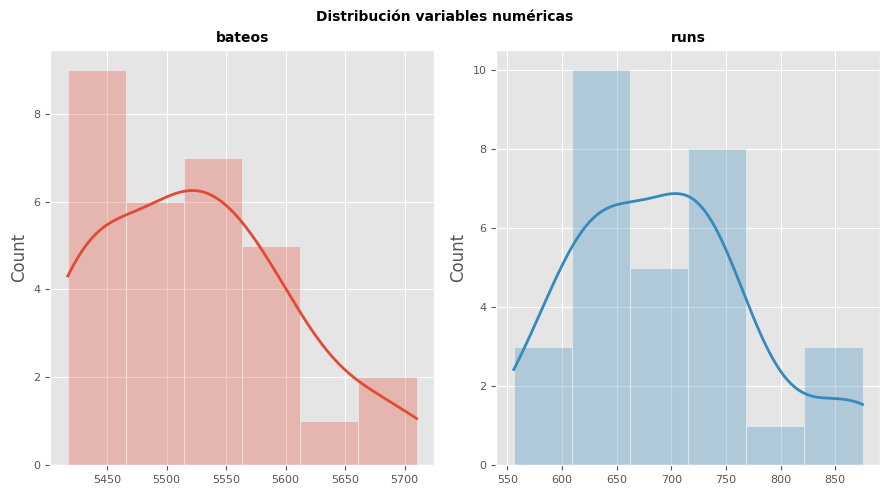

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
#2 y 3

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = datos['bateos']
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Fri, 28 Apr 2023   Prob (F-statistic):            0.00906
Time:                        00:26:02   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [ ]:
#4

# Y = 0.5529X - 2367.7028

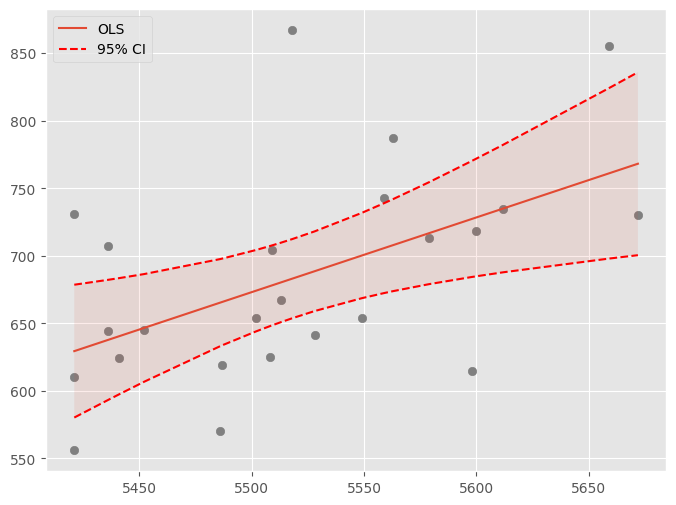

In [ ]:
#5

predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train.iloc[:,1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [ ]:
#6

from sklearn.metrics import mean_squared_error, mean_absolute_error

X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)

mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predicciones)

mse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = True
       )

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )

print(f"El error (mae) de test es: {mae}\n El error (mse) de test es: {mse} \n El error (rmse) de test es: {rmse}")

El error (mae) de test es: 53.0179186717055
 El error (mse) de test es: 3520.8458755574143 
 El error (rmse) de test es: 59.33671608336119


In [ ]:
#7

print(f"El modelo al tener una correlacion de un 27% nos sugiere que existe una relacion debil entre las variables, aun asi posee un F-statistic de un (p > 0.00906), lo que nos indica que existe una relacion lineal significativa pero al tener una relacion debil, pueden que influyan otros factores en el partido y que predecir resultados con este modelo no seria la mejor opcion")

El modelo al tener una correlacion de un 27% nos sugiere que existe una relacion debil entre las variables, aun asi posee un F-statistic de un (p > 0.00906), lo que nos indica que existe una relacion lineal significativa pero al tener una relacion debil, pueden que influyan otros factores en el partido y que predecir resultados con este modelo no seria la mejor opcion
